In [1]:
import os
import numpy as np
import random
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import MNISTClassifier
import envs
import agents_maml
import maml

import matplotlib.pyplot as plt

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
random.seed(random_seed)

In [63]:
## Setting up the environment

In [64]:
model_name = 'model_4'
models = ['model_1','model_2','model_3']
env = envs.SUTEnv(model_name)

In [65]:
test_model = MNISTClassifier.load_model(model_name)
testset_path = "sample_test_set"
testset = np.load(testset_path+"_data.npy") #[Num Samples, 1, 1, 28, 28]
testset_labels = np.load(testset_path+"_labels.npy")
losses, sim_log = MNISTClassifier.test_sample(test_model.cuda(), testset, testset_labels)


Test set: Avg. loss: 21.9500, Accuracy: 42/50 (84%)



In [66]:
agent = agents_maml.AgentMAML(env.n_actions)
hidden = (Variable(torch.zeros(1, 1, 50).float()), Variable(torch.zeros(1, 1, 50).float()))


In [67]:
meta_trainer = maml.Meta(models, model_name)

LSTM:................................................


In [68]:
max_iters = 50
num_succ = 0
succ_rate = []
meta_trainer.forward()

1.0
Correct label:  1   5
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0
<class 'torch.Tensor'>
<class 'torch.nn.parameter.Parameter'>
0
<class 'torch.Tensor'>
<class 'torch.nn.parameter.Parameter'>
0
<class 'torch.Tensor'>
<class 'torch.nn.parameter.Parameter'>
0
<class 'torch.Tensor'>
<class 'torch.nn.parameter.Parameter'>
0
<class 'torch.Tensor'>
<class 'torch.nn.parameter.Parameter'>
0
<class 'torch.Tensor'>
<class 'torch.nn.parameter.Parameter'>
0
<class 'torch.Tensor'>
<class 'torch.nn.parameter.Parameter'>
0
<class 'torch.Tensor'>
<class 'torch.nn.parameter.Parameter'>
0
<class 'torch.Tensor'>
<class 'torch.nn.parameter.Parameter'>
0
<class 'torch.Tensor'>
<class 'torch.nn.parameter.Parameter'>
0.99999999
Correct label:  7   8
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.99999998
Correct label:  7   2
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.9999999700000002
Correct label:  0   0
Succ
here
torch.Size([1, 10])
(1,)


here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.9999998600000084
Correct label:  3   3
Succ
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.9999998500000098
Correct label:  3   5
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.9999998400000112
Correct label:  1   1
Succ
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.9999998300000127
Correct label:  6   6
Succ
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.9999998200000144
Correct label:  6   6
Succ
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.9999998100000161
Correct label:  7   7
Succ
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.999999800000018
Correct label:  6   6
Succ
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.9999997900000199
Correct label:  7   7
Succ
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.999999780000022
Correct label:  1   1
Succ
here
torch.Size([

In [69]:
rate, env = meta_trainer.finetunning()

1.0
Correct label:  0   0
Succ
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.99999999
Correct label:  3   3
Succ
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.99999998
Correct label:  7   7
Succ
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.9999999700000002
Correct label:  7   7
Succ
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.9999999600000004
Correct label:  9   8
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.9999999500000007
Correct label:  3   3
Succ
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.9999999400000013
Correct label:  8   1
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.9999999300000018
Correct label:  9   8
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.9999999200000024
Correct label:  5   6
here
torch.Size([1, 10])
(1,)
Q_learning
torch.Size([1, 1, 50])
0.9999999100000031
Correct label:  0   0
Succ
here
torch.Size

In [73]:
env.action_log

[(17, True, 0.18604326248168945),
 (2, True, 0.018520355224609375),
 (0, True, 0.009907722473144531),
 (0, True, 0.009907722473144531),
 (7, False, 1.6465299129486084),
 (2, True, 0.018520355224609375),
 (37, False, 2.942694664001465),
 (7, False, 1.6465299129486084),
 (43, False, 2.5709123611450195),
 (47, True, 0.001132965087890625),
 (27, False, 2.2500269412994385),
 (24, True, 0.0002918243408203125),
 (34, False, 3.9273767471313477),
 (18, True, 0.1035761833190918),
 (45, True, 0.000743865966796875),
 (6, True, 0.046488285064697266),
 (20, True, 0.011045455932617188),
 (0, True, 0.009907722473144531),
 (18, True, 0.1035761833190918),
 (20, True, 0.011045455932617188),
 (20, True, 0.011045455932617188),
 (4, True, 0.06641769409179688),
 (38, True, 0.20589160919189453),
 (7, False, 1.6465299129486084),
 (39, True, 0.0005407333374023438),
 (34, False, 3.9273767471313477),
 (30, True, 0.09131479263305664),
 (16, True, 0.0036478042602539062),
 (13, True, 2.574920654296875e-05),
 (15, Fa

In [78]:
dqn = [63.52, 74.57, 27.84, 27.03]
maml = [61.07, 83.157, 50.8, 30.62]

In [2]:
maml1 = np.load('maml_model_1.npy')
maml2 = np.load('maml_model_2.npy')
maml3 = np.load('maml_model_3.npy')
maml4 = np.load('maml_model_4.npy')

In [3]:
drqn1 = np.load('DRQN_model_1.npy')
drqn2 = np.load('DRQN_model_2.npy')
drqn3 = np.load('DRQN_model_3.npy')
drqn4 = np.load('DRQN_model_4.npy')

In [4]:
maml_avg = (maml1+maml2+maml3+maml4)/4
drqn_avg = (drqn1 + drqn2 + drqn3 + drqn4)/4

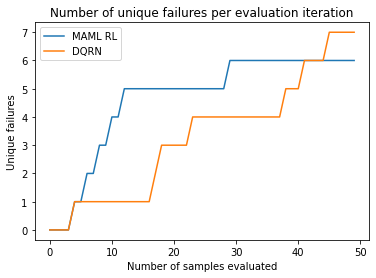

In [7]:
plt.plot(maml4, label='MAML RL')
plt.plot(drqn4, label='DQRN')
plt.ylabel('Unique failures')
plt.xlabel('Number of samples evaluated')
plt.title('Number of unique failures per evaluation iteration')
plt.legend()
plt.savefig('plot1.pdf')

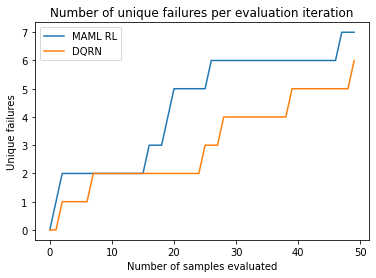

In [8]:
plt.plot(maml3, label='MAML RL')
plt.plot(drqn3, label='DQRN')
plt.ylabel('Unique failures')
plt.xlabel('Number of samples evaluated')
plt.title('Number of unique failures per evaluation iteration')
plt.legend()
plt.savefig('plot2.pdf')

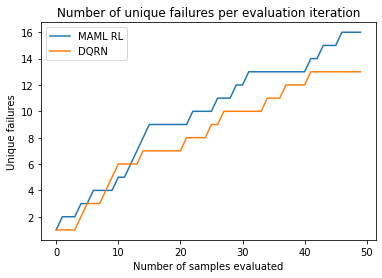

In [9]:
plt.plot(maml1, label='MAML RL')
plt.plot(drqn1, label='DQRN')
plt.ylabel('Unique failures')
plt.xlabel('Number of samples evaluated')
plt.title('Number of unique failures per evaluation iteration')
plt.legend()
plt.savefig('plot3.pdf')